In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("D:\zomato_analysis\Zomato data .csv")

In [3]:
df.head(20)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [15]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [8]:
#q1
#solve karne se pehle humne dekha ki rating 4.1/5 hain we just want it to be 4.1 only 
#so let's create a function fo this
def handle_rate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)
df["rate"]=df["rate"].apply(handle_rate)
print(df.head())
#code explanation
#basically function main value pass kardi aur phir 
#str(value).split("/") mtlb ki jo humara column hain vo str format hain usmain se / yeah kat jaye
#value=value[0] mtlb 0 index vala bach jaye bas mtlb 4.1 etc
#aur return karde with datatype float main convert karke
#ab yeah cheez bas simply apply kardo rate column main

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
df.info()
#we chwcked the datatype of each which is correct and the values are not empty in any of the following columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Types of Restaurant')

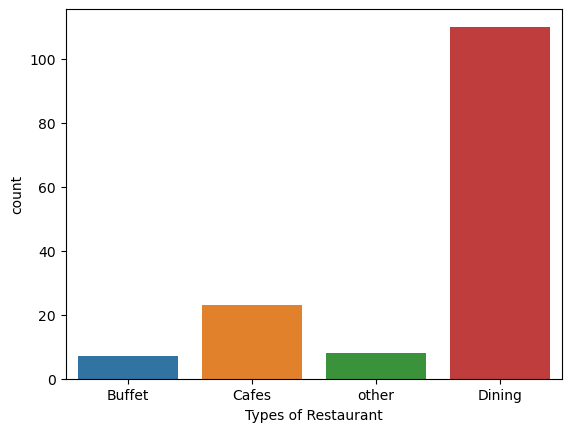

In [18]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Types of Restaurant")

In [24]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Text(0, 0.5, 'Number of Votes')

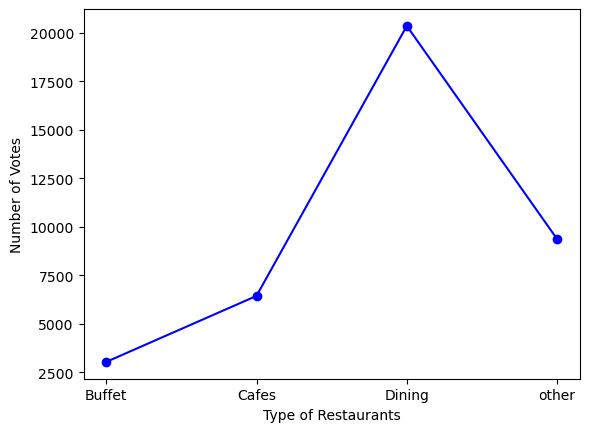

In [44]:
# q2
grouped_data=df.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="blue",marker="o")
plt.xlabel("Type of Restaurants",size=10)
plt.ylabel("Number of Votes",size=10)

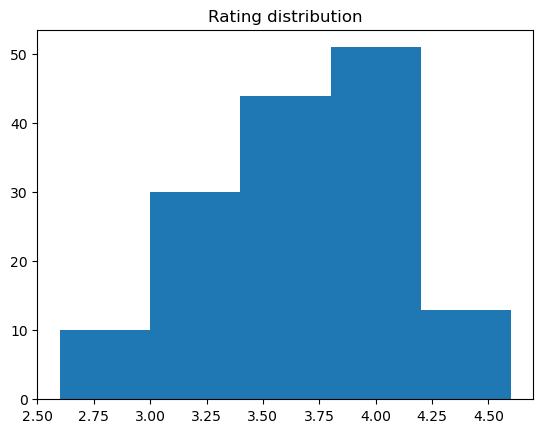

In [64]:
# q3
plt.hist(df["rate"],bins=5)
plt.title("Rating distribution")
plt.show()

In [68]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

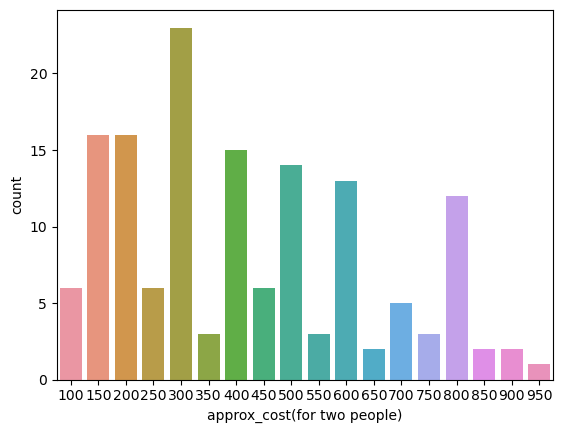

In [80]:
#q4
couple_data=df["approx_cost(for two people)"]
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

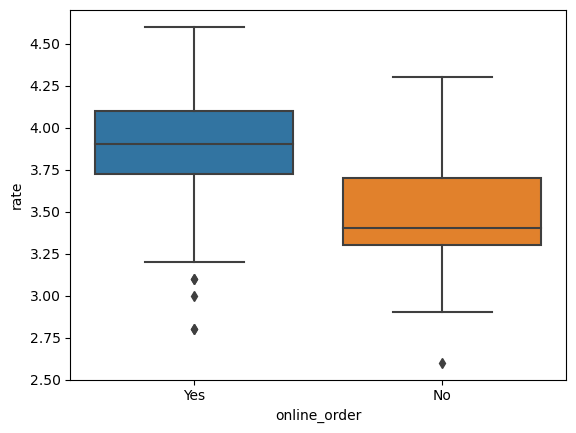

In [90]:
#q5
sns.boxplot(x="online_order",y="rate",data=df)
#toh online walo ki rating hain 3.75-4.25 and offline rating is: 3.25-3.75

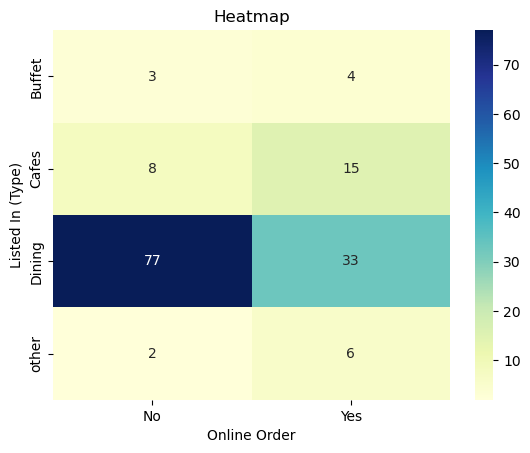

In [97]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

In [100]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [105]:
x=df[["votes","approx_cost(for two people)"]]
y=df["rate"]

In [101]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [106]:
model.fit(x,y)

LinearRegression()

In [107]:
model.predict([[123,500]])

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.61320516])